In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read file into Pandas from a URL
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/sms.tsv'
df = pd.read_table(url, header=None, names=['label', 'message'])
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
df['label'] = df.label.map({'ham':0,'spam':1})
df

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X = df['message']
y = df['label']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
print(X_train.shape)
print(X_test.shape)

(4457,)
(1115,)


## Vectorization

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

In [9]:
vect = CountVectorizer()
vect.fit(X_train)

CountVectorizer()

In [10]:
X_train_dtm = vect.transform(X_train)
X_train_dtm

<4457x7702 sparse matrix of type '<class 'numpy.int64'>'
	with 59296 stored elements in Compressed Sparse Row format>

In [11]:
# X_train_dtm.toarray()

In [12]:
X_test_dtm = vect.transform(X_test)
X_test_dtm

<1115x7702 sparse matrix of type '<class 'numpy.int64'>'
	with 13781 stored elements in Compressed Sparse Row format>

## Naive Bayes

In [13]:
from sklearn.naive_bayes import MultinomialNB

In [14]:
nb = MultinomialNB()

In [15]:
%time nb.fit(X_train_dtm,y_train)

Wall time: 5.95 ms


MultinomialNB()

In [16]:
y_pred = nb.predict(X_test_dtm)

In [17]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [18]:
accuracy_score(y_test,y_pred)

0.9919282511210762

In [19]:
print(confusion_matrix(y_test,y_pred))

[[966   0]
 [  9 140]]


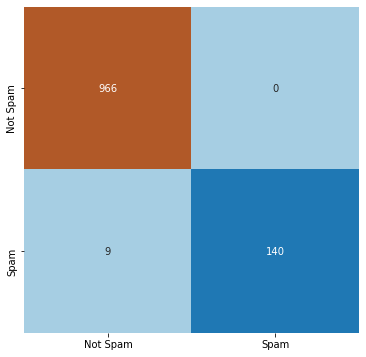

In [20]:
cmat = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (6, 6))
sns.heatmap(cmat, annot = True, 
            cmap = 'Paired', cbar = False, fmt="d", xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam']);

In [21]:
# 9 False negatie
X_test[y_test>y_pred]

3864    Oh my god! I've found your number again! I'm s...
2575    Your next amazing xxx PICSFREE1 video will be ...
2402    Babe: U want me dont u baby! Im nasty and have...
2663    Hello darling how are you today? I would love ...
751     Do you realize that in about 40 years, we'll h...
856     Talk sexy!! Make new friends or fall in love i...
3360    Sorry I missed your call let's talk when you h...
3425    Am new 2 club & dont fink we met yet Will B gr...
731     Email AlertFrom: Jeri StewartSize: 2KBSubject:...
Name: message, dtype: object

## Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
lr = LogisticRegression()

In [24]:
%time lr.fit(X_train_dtm,y_train)

Wall time: 55.8 ms


LogisticRegression()

In [25]:
y_pred = lr.predict(X_test_dtm)

In [26]:
accuracy_score(y_test,y_pred)

0.9883408071748879

In [27]:
print(confusion_matrix(y_test,y_pred))

[[966   0]
 [ 13 136]]


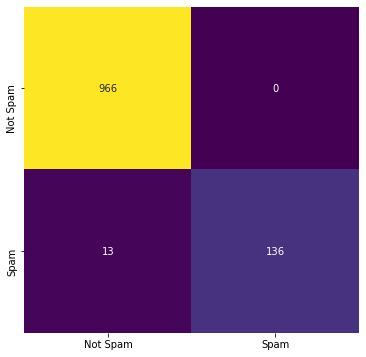

In [31]:
cmat = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (6, 6))
sns.heatmap(cmat, annot = True, 
            cmap = 'viridis', cbar = False, fmt="d", xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam']);

## Naive Bayes gives us more accuracy than logistic regression